In [162]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale

In [164]:
cars_df = pd.read_csv('cars_dataset.csv')

In [165]:
print(cars_df.shape)

(72435, 10)


# Pre-Processing

In [166]:
cars_df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [167]:
cars_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [168]:
cars_df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai
72434,Tucson,2016,15999,Automatic,11472,Diesel,125.0,57.6,1.7,Hyundai


In [169]:
cars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [170]:
cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,72435.0,2017.073666,2.101252,1996.0,2016.0,2017.0,2019.0,2020.0
price,72435.0,16580.158708,9299.028754,495.0,10175.0,14495.0,20361.0,145000.0
mileage,72435.0,23176.517057,21331.515562,1.0,7202.5,17531.0,32449.0,323000.0
tax,72435.0,116.953407,64.045533,0.0,30.0,145.0,145.0,580.0
mpg,72435.0,55.852480,17.114391,0.3,47.9,55.4,62.8,470.8
engineSize,72435.0,1.635650,0.561535,0.0,1.2,1.6,2.0,6.6


# Organizing

In [171]:
cars_df['Make'].unique()

array(['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai'],
      dtype=object)

In [172]:
cars_df['Make'].value_counts()

Make
Ford       17964
vw         15157
BMW        10781
audi       10668
toyota      6738
skoda       6267
Hyundai     4860
Name: count, dtype: int64

In [173]:
cars_df.groupby(by=["Make"]).mean(numeric_only=True)

,year,price,mileage,tax,mpg,engineSize
Make,,,,,,
BMW,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
Ford,2016.864173,12280.078435,23361.880149,113.329437,57.907832,1.350824
Hyundai,2017.107613,12750.131070,21486.049588,121.147119,53.827798,1.457922
audi,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
skoda,2017.502314,14275.449338,20118.452050,117.407053,56.589165,1.433509
toyota,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
vw,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693


In [174]:
make_group = cars_df.groupby(by=["Make","model","year","transmission"]).mean(numeric_only=True)

In [175]:
make_group

price        mileage         tax  \
Make model     year transmission                                            
BMW   1 Series 2001 Manual        13000.000000   22633.000000  125.000000   
               2004 Manual         2495.000000  112000.000000  200.000000   
               2005 Automatic      3795.000000   63547.000000  265.000000   
               2006 Manual         2992.500000   89000.000000  230.000000   
               2007 Manual         1500.000000  167000.000000  125.000000   
...                                        ...            ...         ...   
vw    Up       2018 Semi-Auto      9955.833333   12041.000000  145.833333   
               2019 Automatic     12995.000000    2563.000000  145.000000   
                    Manual         9909.364238    2984.933775  145.331126   
                    Semi-Auto     12261.333333    3616.000000  145.000000   
               2020 Manual        10943.678571    1448.303571  145.535714   

                                        mpg  engineSize  
Make model     year transmission                         
BMW   1 Series 2001 Manual        53.300000         0.0  
               2004 Manual        49.600000         2.0  
               2005 Automatic     42.800000         2.0  
               2006 Manual        43.650000         1.8  
               2007 Manual        57.600000         2.0  
...                                     ...         ...  
vw    Up       2018 Semi-Auto     68.633333         1.0  
               2019 Automatic     52.300000         1.0  
                    Manual        54.368212         1.0  
                    Semi-Auto     52.300000         1.0  
               2020 Manual        53.425000         1.0  

[2369 rows x 5 columns]

In [176]:
cars_corr = cars_df.corr(numeric_only=True)

<Axes: >

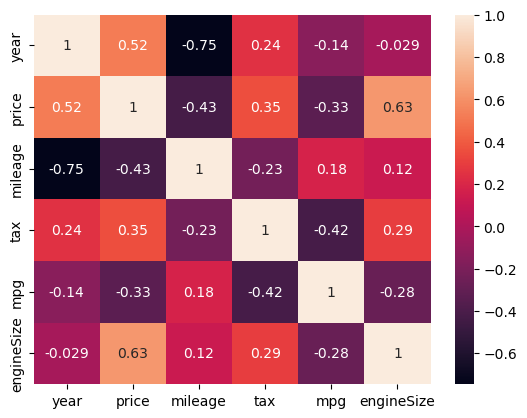

In [177]:
sns.heatmap(cars_corr, annot=True)

# Visualization

([<matplotlib.patches.Wedge at 0x15f0aeb90>,
 [Text(-0.7729190238785778, 0.7826852384749483, 'audi'),
  Text(-0.8791279474462104, -0.6611611392232708, 'BMW'),
  Text(0.21744407085864373, -1.0782940582459042, 'Ford'),
  Text(0.9945038467672106, -0.4700660578740191, 'vw'),
  Text(1.0464272560462269, 0.3391017514014995, 'toyota'),
  Text(0.7030505330979441, 0.8460023332773362, 'skoda'),
  Text(0.23014940052000027, 1.0756538725074551, 'Hyundai')])

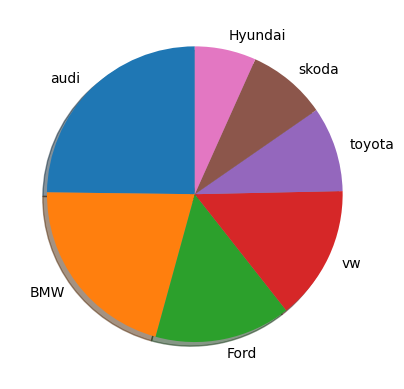

In [178]:
plt.pie(cars_df.Make.value_counts(), labels=cars_df.Make.unique(), shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x15c8b3d90>,
 [Text(-1.0524580604173153, -0.3198937809064487, 'Manual'),
  Text(1.046117943928162, -0.3400547711641681, 'Automatic'),
  Text(0.6297383076262443, 0.9019033561906918, 'Semi-Auto'),
  Text(0.00019084556567010798, 1.0999999834445318, 'Other')])

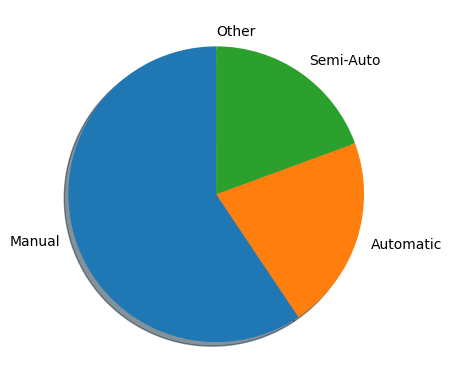

In [179]:
plt.pie(cars_df.transmission.value_counts(), labels=cars_df.transmission.unique(),shadow=True, startangle=90)

([<matplotlib.patches.Wedge at 0x15c90eb10>,
 [Text(-1.082208573865754, -0.1970395966587701, 'Petrol'),
  Text(1.0989541655252288, 0.04795562610109356, 'Diesel'),
  Text(0.1611961656975962, 1.0881248991565229, 'Hybrid'),
  Text(0.011878989475678961, 1.0999358570430535, 'Other'),
  Text(0.0002383912172280321, 1.0999999741680122, 'Electric')])

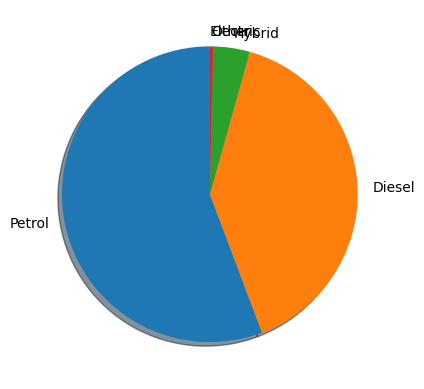

In [180]:
plt.pie(cars_df.fuelType.value_counts(), labels=cars_df.fuelType.unique(), shadow=True, startangle=90)

<Axes: xlabel='transmission', ylabel='count'>

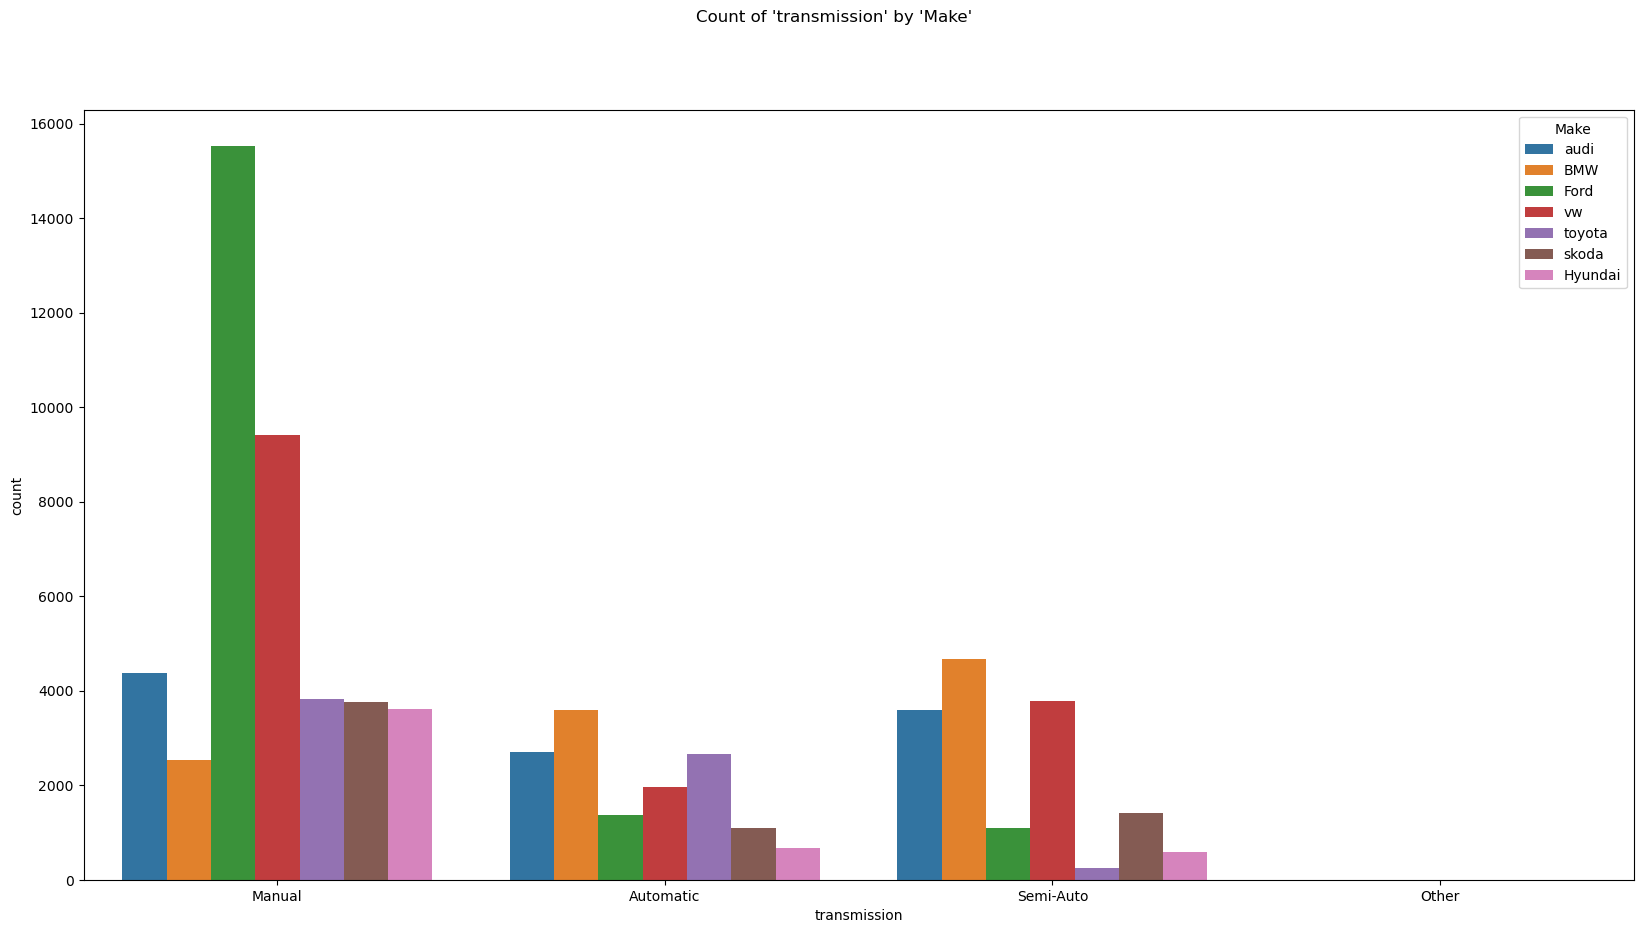

In [181]:
plt.figure(figsize=(20, 10))
plt.suptitle("Count of 'transmission' by 'Make'")
sns.countplot(data=cars_df, x='transmission', hue='Make')

<Axes: xlabel='fuelType', ylabel='count'>

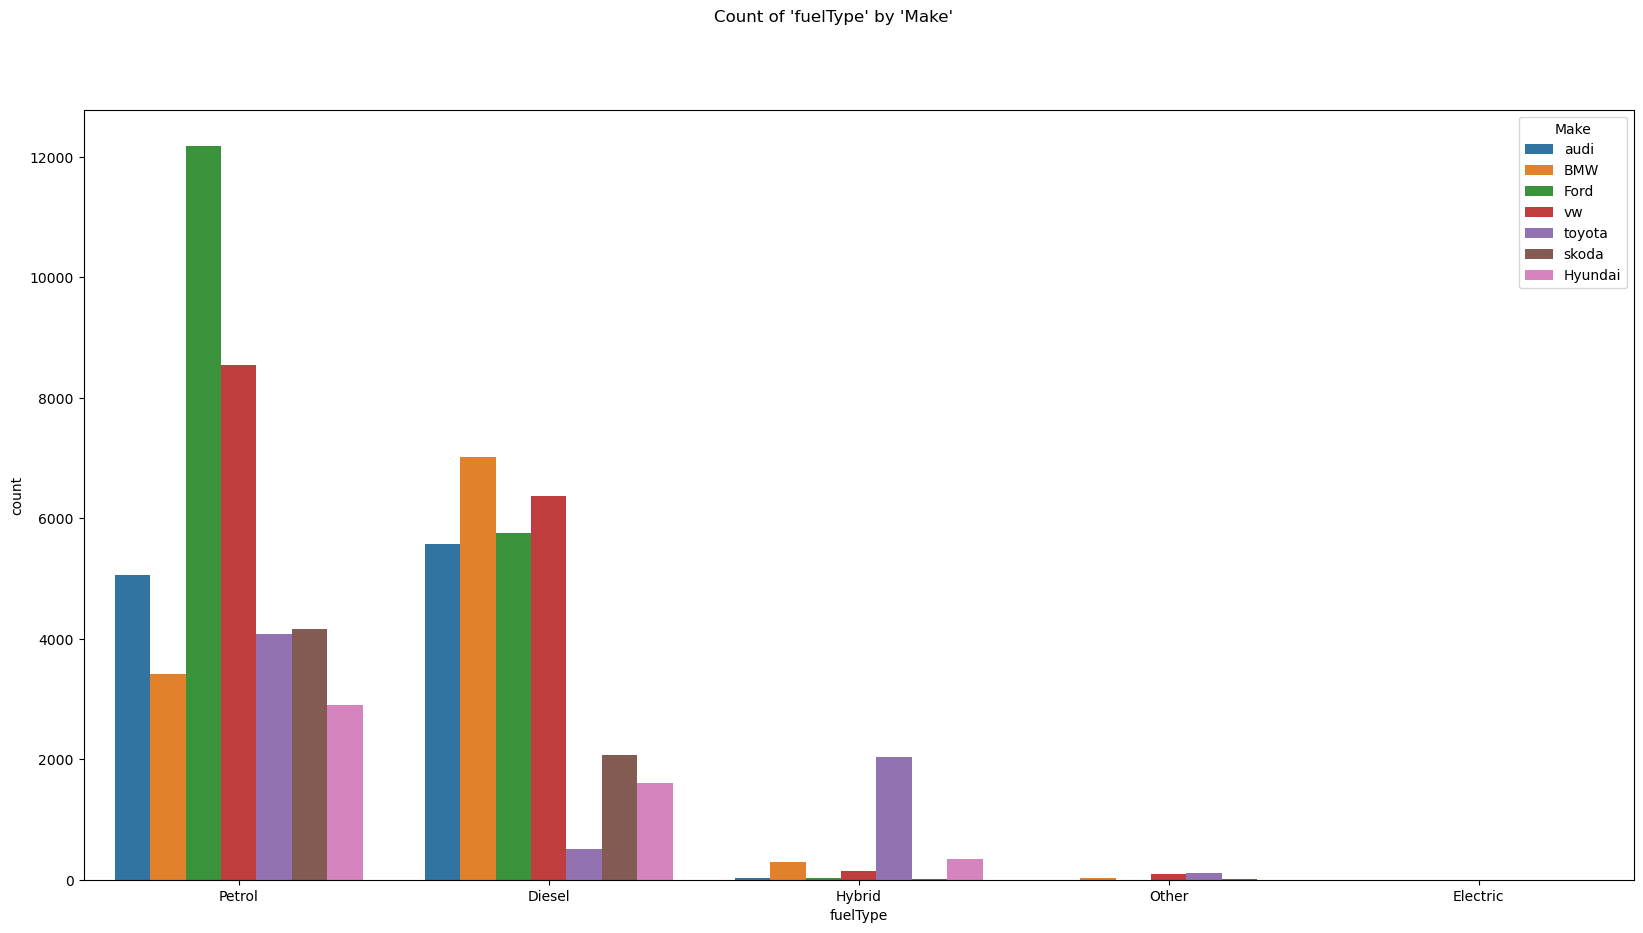

In [182]:
plt.figure(figsize=(20, 10))
plt.suptitle("Count of 'fuelType' by 'Make'")
sns.countplot(data=cars_df, x='fuelType', hue='Make')

<Axes: title={'center': 'transmission VS year'}, xlabel='year', ylabel='transmission'>

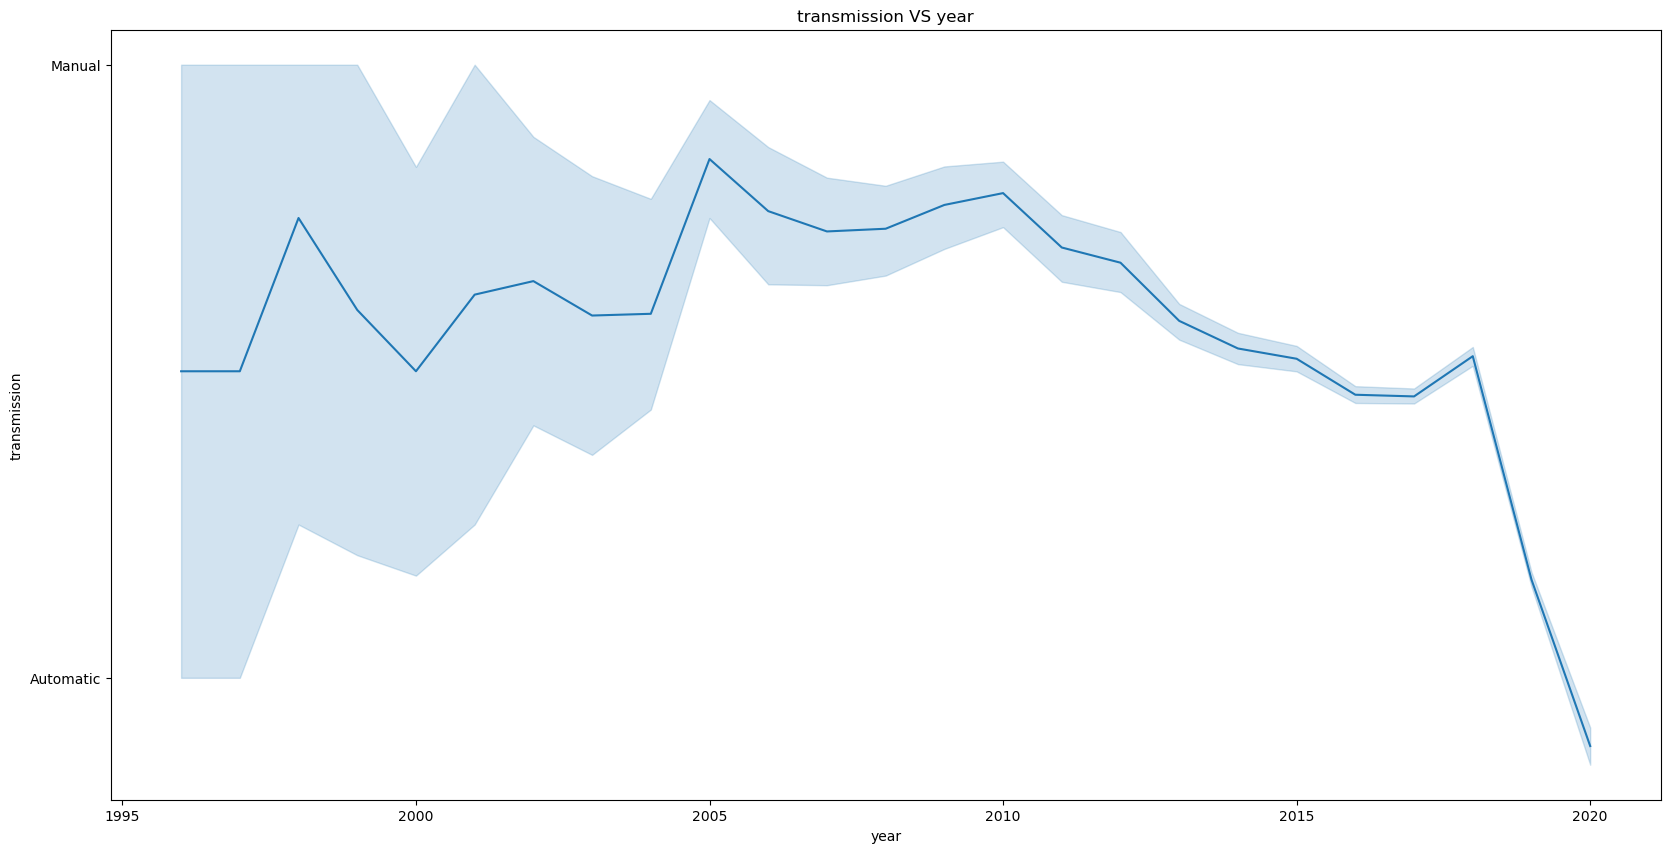

In [183]:
_, ax = plt.subplots(figsize=(20, 10))
plt.title('transmission VS year')
sns.lineplot(data=cars_df, y=cars_df.transmission, x=cars_df.year)

<Axes: title={'center': 'price VS year'}, xlabel='year', ylabel='price'>

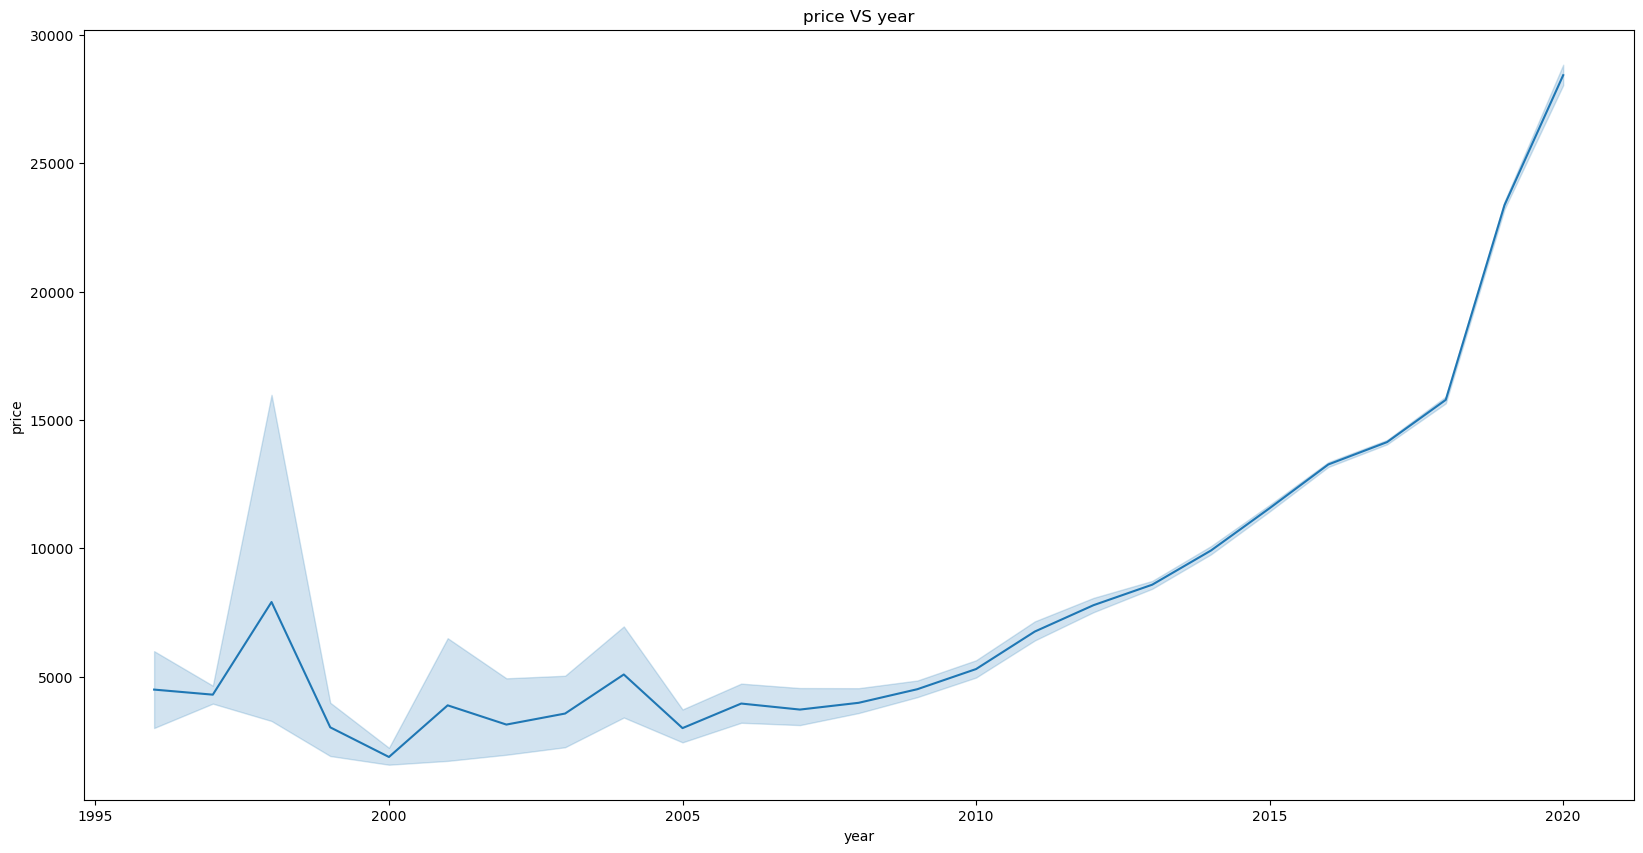

In [184]:
_, ax = plt.subplots(figsize=(20, 10))
plt.title('price VS year')
sns.lineplot(data=cars_df, y=cars_df.price, x=cars_df.year)

# Regression Modeling

## Experiment 1: Basic Linear Regression Model

In [201]:
X = cars_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = cars_df['price']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  26193652.42595948


In [200]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 5117.973468665061


## Experiment 2: Dummies

In [187]:
X = cars_df.drop(['model', 'price'], axis=1)
y = cars_df['price']

### Pre-Processing

In [207]:
categorical_cols = X.select_dtypes(include=['object'])
# convert into dummies
cat_dummies = pd.get_dummies(cars_categorical, drop_first=True)
# drop categorical variables 
X = X.drop(list(categorical_cols.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, cat_dummies], axis=1)

In [208]:
cols = X.columns

# Scale the features and convert it back to a dataframe
X = pd.DataFrame(scale(X))

# Write in the column names again
X.columns = cols
X.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol', 'Make_Ford',
       'Make_Hyundai', 'Make_audi', 'Make_skoda', 'Make_toyota', 'Make_vw',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol', 'Make_Ford', 'Make_Hyundai', 'Make_audi',
       'Make_skoda', 'Make_toyota', 'Make_vw', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Electric',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol', 'Make_Ford',
       'Make_Hyundai', 'Make_audi', 'Make_skoda', 'Make_toyota', 'Make_vw',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol', 'Make_Ford', 'Mak

### Model 

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=68)

In [210]:
lrm = LinearRegression()

# Fit the model
lrm.fit(X_train, y_train)

# Make prediction
y_pred = lrm.predict(X_test)

# Performance metrics
lrm_r2= r2_score(y_test, y_pred)
lrm_mae = mean_absolute_error(y_test, y_pred)

# Show the metrics
print("Linear Regression R2: ", lrm_r2)
print("Linear Regression MAE: ", lrm_mae)

Linear Regression R2:  0.7628457689068864
Linear Regression MAE:  2854.9190017272135


## Experiment 3: Decision Tree

In [192]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder

### Pre-Processing

In [193]:
categorical_cols = ['transmission', 'fuelType', 'Make']  # Specify categorical columns
X_encoded = pd.get_dummies(cars_df.drop(['model', 'price'], axis=1), columns=categorical_cols, drop_first=True)
y = cars_df['price']

### Model

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=68)

In [212]:
dtr = DecisionTreeRegressor(random_state=68)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=68)

In [213]:
y_pred = dtr.predict(X_test)

In [214]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [215]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1623.5672094722013
MSE: 7691417.885543841
RMSE: 2773.340564291346
R2: 0.9124146551030977
